In [1]:
import pandas as pd
print("pandas version: {}". format(pd.__version__))

import mlflow
print("mlflow version: {}". format(mlflow.__version__))

import matplotlib.pyplot as plt
import seaborn as sns

pandas version: 1.5.3
mlflow version: 2.1.1


In [2]:
experiment_name = "houseprices_BasicModels_pipeline_0.6"

In [3]:
current_experiment=dict(mlflow.get_experiment_by_name(experiment_name))

In [4]:
current_experiment

{'artifact_location': 'file:///e:/Data%20Science%20Projects/Kaggle/House%20Prices/04_MachineLearningModels/mlruns/804462029300148027',
 'creation_time': 1678390449269,
 'experiment_id': '804462029300148027',
 'last_update_time': 1678390449269,
 'lifecycle_stage': 'active',
 'name': 'houseprices_BasicModels_pipeline_0.6',
 'tags': {}}

In [5]:
experiment_id=current_experiment['experiment_id']

In [6]:
df_mlflow = mlflow.search_runs([experiment_id])

In [7]:
df_mlflow.head()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.cv_rmse,metrics.cv_var,metrics.r2,metrics.best_cv_score,...,params.bayesianRidge_alpha_init,params.ridge_max_iter,params.ridge_solver,params.ridge_alpha,params.lasso_max_iter,params.lasso_alpha,tags.mlflow.runName,tags.mlflow.parentRunId,tags.script_version,tags.script_name
0,6853a10999d0446aa855e2d1a47923b1,804462029300148027,RUNNING,file:///e:/Data%20Science%20Projects/Kaggle/Ho...,2023-04-24 19:29:20.979000+00:00,None,58582.298447,5.259418e+07,NaN,NaN,...,None,None,None,None,None,None,enthused-panda-746,3e7f65ddd68741ffa074af248f4bc4fc,None,None
1,38af60d2c7154a9a85feed3c509f9b35,804462029300148027,RUNNING,file:///e:/Data%20Science%20Projects/Kaggle/Ho...,2023-04-24 19:28:52.632000+00:00,None,57359.222013,4.592539e+07,NaN,NaN,...,None,None,None,None,None,None,overjoyed-worm-830,3e7f65ddd68741ffa074af248f4bc4fc,None,None
2,551f07a830ac4d46a428167aec49207c,804462029300148027,RUNNING,file:///e:/Data%20Science%20Projects/Kaggle/Ho...,2023-04-24 19:28:33.431000+00:00,None,51840.227154,4.107763e+07,NaN,NaN,...,None,None,None,None,None,None,dashing-roo-267,3e7f65ddd68741ffa074af248f4bc4fc,None,None
3,45d883c57db84f168dc443145ec09b86,804462029300148027,RUNNING,file:///e:/Data%20Science%20Projects/Kaggle/Ho...,2023-04-24 19:28:28.712000+00:00,None,78176.375043,4.127078e+07,NaN,NaN,...,None,None,None,None,None,None,big-steed-639,3e7f65ddd68741ffa074af248f4bc4fc,None,None
4,e4177cede40d45b3b3edf714c7c0a418,804462029300148027,RUNNING,file:///e:/Data%20Science%20Projects/Kaggle/Ho...,2023-04-24 19:28:03.466000+00:00,None,46328.295751,4.712449e+07,NaN,NaN,...,None,None,None,None,None,None,calm-cow-684,3e7f65ddd68741ffa074af248f4bc4fc,None,None


In [8]:
list(df_mlflow)

['run_id',
 'experiment_id',
 'status',
 'artifact_uri',
 'start_time',
 'end_time',
 'metrics.cv_rmse',
 'metrics.cv_var',
 'metrics.r2',
 'metrics.best_cv_score',
 'params.algo',
 'params.preprocessing_scaler',
 'params.pca_n_components',
 'params.rfr_max_leaf_nodes',
 'params.preprocessing_skewed_threshold',
 'params.rfr_min_samples_split',
 'params.preprocessing_correlation',
 'params.preprocessing_ohe_max_categories',
 'params.preprocessing_imputer_function_numeric',
 'params.rfr_n_estimators',
 'params.log_transform_salePrice',
 'params.rfr_max_depth',
 'params.preprocessing_feature_selection_low_variance_flag',
 'params.preprocessing_ohe_min_frequency',
 'params.rfr_min_samples_leaf',
 'params.rfr_max_features',
 'params.columnprep__transformers_num',
 'params.gbr_min_samples_leaf',
 'params.gbr_max_depth',
 'params.gbr_n_estimators',
 'params.gbr_alpha',
 'params.gbr_max_features',
 'params.gbr_learning_rate',
 'params.gbr_subsample',
 'params.gbr_min_samples_split',
 'params.e

In [9]:
df_mlflow.status.value_counts()

RUNNING    335
Name: status, dtype: int64

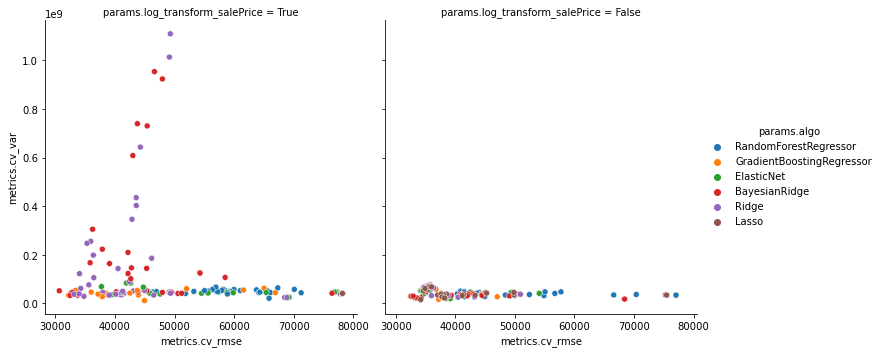

In [12]:
sns.relplot(data=df_mlflow, x="metrics.cv_rmse", y="metrics.cv_var", col="params.log_transform_salePrice", hue="params.algo", kind="scatter")

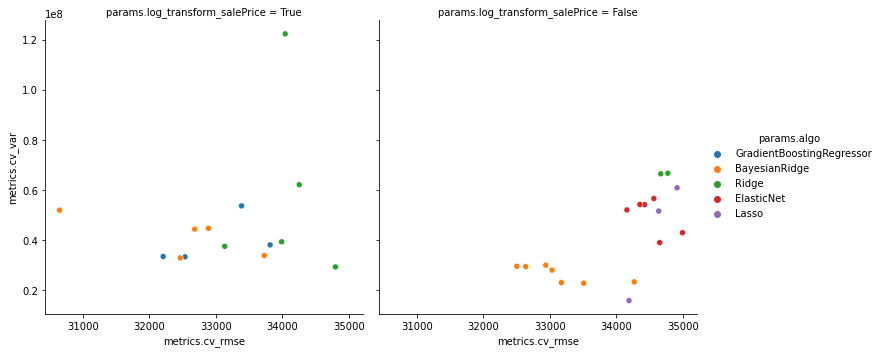

In [13]:
sns.relplot(data=df_mlflow[df_mlflow["metrics.cv_rmse"]<35000], x="metrics.cv_rmse", y="metrics.cv_var", col="params.log_transform_salePrice", hue="params.algo", kind="scatter")

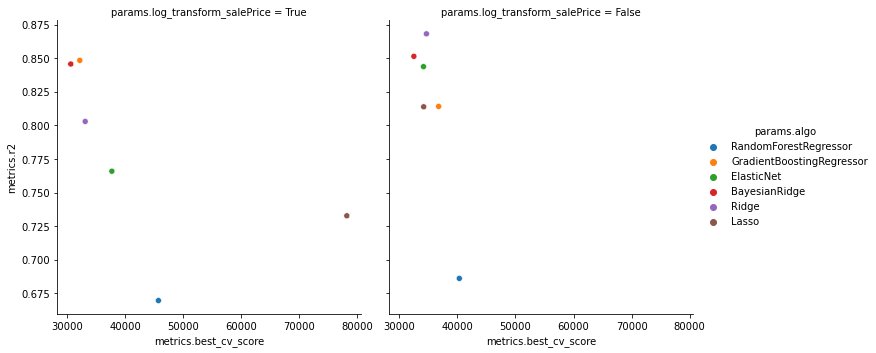

In [15]:
sns.relplot(data=df_mlflow, x="metrics.best_cv_score", y="metrics.r2", col="params.log_transform_salePrice", hue="params.algo", kind="scatter")